### 1. 逻辑回归概述及函数

#### 1.1 概述

逻辑斯蒂回归（logistic regression）是在数据科学领域最常用到的方法之一，虽然名字为”回归“，但是主要是解决分类问题。

在逻辑回归中，我们会得到一个事件的概率值，当>=0.5时，事件发生；当<0.5时，事件不发生。
  
\begin{equation}
y=\left\{
             \begin{array}{lr}
             1, & \hat{p}\geq0.5\\
             0, & \hat{p}<0.5\\ 
             \end{array}
\right.
\end{equation}
 
#### 1.2 函数表示

在线性回归中，估计值y为：
  
\begin{equation}
\hat{y}=\theta^T \cdot x_b
\end{equation}

这样得到的y值值域为[-inf,inf]，而概率的值域为[0,1]。因此我们想引入一个$\sigma$, 使得函数值的值域在0到1之间，从而更方便的改变概率值。

\begin{equation}
\hat{p}= \sigma\left(\theta^T \cdot x_b\right)
\end{equation}

而这个$\sigma$我们一般用**Sigmoid函数**：
\begin{equation}
\sigma\left(t\right)=\frac{1}{1+e^{-t}}
\end{equation}


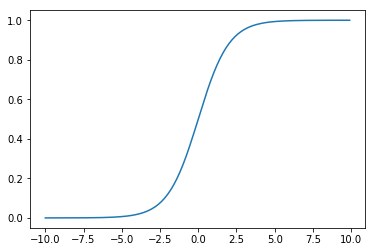

In [110]:
# Sigmoid函数

import numpy as np
import matplotlib.pyplot as plt

def sigmoid(t):
    return 1/(1+np.exp(-t))

x = np.arange(-10, 10, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.show()

这个函数的值域在（0,1）之间；当t > 0时，p > 0.5; 当t < 0时，p < 0.5 。

当我们把sigmoid函数的t替换为线性函数时：

\begin{equation}
\hat{p}= \sigma\left(\theta^T \cdot x_b\right)=\frac{1}{1+e^{-\theta^T \cdot x_b}}
\end{equation}


#### 1.3 损失函数的推导和求解

从上述公式中，我们可以看出对于一组数据X，要想预测出y，那么需要知道$\theta$的值。当损失函数最小时，对应的$\theta$也就是我们想找的了。当真实情况（y）为1时，预测的p越小，则cost越大；y是0时，预测的p越大，则cost越大。什么样的函数满足呢？


\begin{equation}
cost=\left\{
             \begin{array}{lr}
             -log\left(\hat{p}\right), & y=1\\
             -log\left(1-\hat{p}\right), & y=0\\ 
             \end{array}
\right.
\end{equation}

这个cost函数的图像为（p只能在0-1之间取值）：

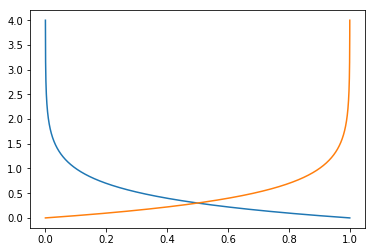

In [111]:
import math
x = np.arange(0.0001, 1, 0.0001)
y1 = [-(math.log10(i)) for i in x]
y2 = [-(math.log10(1-i)) for i in x]


fig,ax = plt.subplots()

plt.plot(x , y1)
plt.plot(x , y2)
plt.show()

由于这样分类讨论并不方便，因此可以将这两部分合为一个函数：

\begin{equation}
cost=-ylog\left(\hat{p}\right)-\left(1-y\right)(\left(1-\hat{p}\right)
\end{equation}

对于多个样本而言，损失函数为：
\begin{equation}
J\left(\theta\right)=-\frac{1}{m}\sum_{i=1}^{m} y^{\left(i\right)}log\left(\hat{p}^{\left(i\right)}\right)+\left(1-y^{\left(i\right)}\right)(\left(1-\hat{p}^{\left(i\right)}\right)
\end{equation}

即：

\begin{equation}
J\left(\theta\right)=-\frac{1}{m}\sum_{i=1}^{n} y^{\left(i\right)}log\left(\sigma\left(X_b^{\left(i\right)}\theta\right)\right)+\left(1-y^{\left(i\right)}\right)(\left(1-\sigma\left(X_b^{\left(i\right)}\theta\right)\right)
\end{equation}

这个损失函数没有公式解$\theta$使得$J\left(\theta\right)$最小，但是可以通过梯度下降法求解。由于这是一个凸函数，所以不用考虑局部最优解，只有一个全局最优解。

由于函数比较复杂，先对sigmoid函数进行求导得到：
\begin{equation}
\sigma\left(t\right)=\left(1+e^{-t}\right)^{-1}
\end{equation}

\begin{equation}
\sigma^{'}\left(t\right)=\left(1+e^{-t}\right)^{-2} \cdot e^{-t}
\end{equation}

下面进一步对$log \sigma\left(t\right)$求导：
\begin{equation}
\begin{aligned}
\left(log \sigma\left(t\right)\right)^{'} &= \frac{1}{\sigma\left(t\right)} \cdot \sigma\left(t\right)^{'}\\
&=\frac{1}{\left(1+e^{-t}\right)^{-1}} \cdot \left(1+e^{-t}\right)^{-2} \cdot e^{-t}\\
&=\frac{e^{-t}}{1+e^{-t}}\\
&=1-\frac{1}{1+e^{-t}}\\
&=1-\sigma\left(t\right)
\end{aligned}
\end{equation}

同理可以计算得到：
\begin{equation}
\begin{aligned}
\left(log\left(1-\sigma\left(t\right)\right)\right)^{'} &= -\frac{1}{1-\sigma\left(t\right)} \cdot \sigma\left(t\right)^{'}\\
&=-\left(1+e^{-t}\right)^{-1} \\
&=-\sigma\left(t\right)
\end{aligned}
\end{equation}

最后对$J\left(\theta\right)$的两部分求导：
\begin{equation}
\frac{\mathrm{d} \left(y^{\left(i\right)}log\left(\sigma\left(X_b^{\left(i\right)}\theta\right)\right)\right) }{\mathrm{d} \theta_j}=y^{\left(i\right)}\left(1-\sigma\left(X_b^{\left(i\right)}\theta\right)\right) \cdot X_j^{\left(i\right)}\\
\frac{\mathrm{d} \left(\left(1-y^{\left(i\right)}\right)log\left(1-\sigma\left(X_b^{\left(i\right)}\theta\right)\right)\right) }{\mathrm{d} \theta_j}=\left(1-y^{\left(i\right)}\right)\left(-\sigma\left(X_b^{\left(i\right)}\theta\right)\right) \cdot X_j^{\left(i\right)}
\end{equation}

两者相加，整理可得：
\begin{equation}
\left(y^{\left(i\right)} - \sigma\left(X_b^{\left(i\right)}\theta\right)\right) \cdot X_j^{\left(i\right)}
\end{equation}

所以$J\left(\theta\right)$的导数为：

\begin{equation}
\begin{aligned}
\frac{J\left(\theta\right)}{\theta_j}&=\frac{1}{m}\sum_{i=1}^{m}\left(\sigma\left(X_b^{\left(i\right)}\theta\right)-y^{\left(i\right)}\right)X_j^{\left(i\right)}\\
&=\frac{1}{m}\sum_{i=1}^{m}\left(\hat{y}^{\left(i\right)} - y^{\left(i\right)}\right)X_j^{\left(i\right)}
\end{aligned}
\end{equation}

可以看到与线性回归很像，只是$\hat{y}$在线性回归的基础上套了sigmoid函数。
\begin{equation}
\nabla J\left(\theta\right)=\frac{1}{m} \cdot X_b^T \cdot \left(\sigma\left(X_b\theta\right)-y\right)
\end{equation}


---

### 2. 逻辑回归的python实现

下面是对应的code及调用：

In [153]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
from sklearn.metrics import accuracy_score

class LogisticRegression:
    
    def __init__(self):
        self.coef = None
        self.intercept = None
        self.theta = None
        
    # 定义sigmoid函数
    def sigmoid(self, t):
        return 1/(1 + np.exp(-t))
    
    # 梯度下降法
    def fit(self, X_train, Y_train, eta = 0.01, n_iters = 1e4):   
        
        X_b = np.hstack([np.ones((len(X_train), 1)), X_train]) # 初始向量X_b比X_train是多一列1
        initial_theta = np.zeros(X_b.shape[1]) # 初始theta
        
        def J(theta, X_b, y):
            y_hat = self.sigmoid(X_b.dot(theta))
            return -np.sum(y * np.log(y_hat) + (1-y) * np.log(1-y_hat))/len(X_b)
        
        # 求导
        def dJ(theta, X_b, y):     
            return X_b.T.dot(self.sigmoid(X_b.dot(theta)) - y)/len(X_b)
        
        # 梯度下降
        def gradent_descent(X_b, y, initial_theta, eta, n_iters=1e4, epsilon=1e-8):
            theta = initial_theta
            cur_iter = 0
            
            while cur_iter < n_iters:
                gradient = dJ(theta, X_b, y)
                last_theta = theta
                theta = theta - eta * gradient
                
                if abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon:
                    break
                    
                cur_iter += 1
                
            return theta
         
        self.theta = gradent_descent(X_b, Y_train, initial_theta, eta, n_iters)
        self.intercept = self.theta[0]
        self.coef = self.theta[1:]
        
        return self       
        
    # 预测概率
    def predict_prob(self, X_predict):
        X_b = np.hstack([np.ones((len(X_predict), 1)), X_predict])
        return self.sigmoid(X_b.dot(self.theta))

    # 返回预测值
    def predict(self, X_predict):
        prob = self.predict_prob(X_predict)
        return np.array(prob >= 0.5, dtype='int') # True -> 1 ; False -> 0

    # 得到accuracy score
    def score(self, X_test, y_test):
        y_predict = self.predict(X_test)
        return accuracy_score(y_test, y_predict)
    

In [154]:
# 使用iris数据测试
from sklearn.model_selection import train_test_split
from sklearn import datasets
iris = datasets.load_iris()

# 由于LR适用于二分类问题，而iris有三组预测值，所以先去掉一组
X = iris.data
y = iris.target

X = X[y<2,:2]
y = y[y<2]

# 使用上面写的逻辑回归预测
X_train, X_test, y_train, y_test = train_test_split(X, y)
LR = LogisticRegression()

# 训练
LR.fit(X_train, y_train)

# 参数
# print(LR.coef)
# print(LR.theta)
# print(LR.intercept)

# 概率
print(LR.predict_prob(X_test))

# 预测结果
print(LR.predict(X_test))

# 分数
LR.score(X_test, y_test)



[0.97686488 0.97164471 0.97686488 0.98597419 0.97438396 0.92545021
 0.16039916 0.00594648 0.99814416 0.16039916 0.98603084 0.10331793
 0.08551181 0.03959817 0.13470587 0.59376965 0.00290751 0.99657567
 0.98580286 0.98091347 0.93863763 0.87041905 0.96542582 0.0531791
 0.93816306]
[1 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1]


1.0

---

### 3. sklearn实现二分类逻辑回归

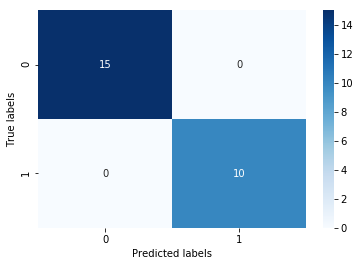

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from sklearn import datasets
iris = datasets.load_iris()

X = iris.data
y = iris.target

X = X[y<2]
y = y[y<2]

X_train, X_test, y_train, y_test = train_test_split(X, y)

# 训练
clf = LogisticRegression()
clf.fit(X_train, y_train)

test_predict = clf.predict(X_test)

# 预测的accuracy达到了1
accuracy_score(y_test, test_predict)

confusion_matrix_result = confusion_matrix(test_predict,y_test)
sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

### 4. 决策边界
对于分类问题，决策边界一个很关键的问题。在sigmoid函数中，当 t>=0.5 时，预测概率p >= 0.5；而t < 0时，预测概率 p < 0.5。而这个t也就是 $\theta^T \cdot x_b$ 。

\begin{equation}
y=\left\{
             \begin{array}{lr}
             1, & \hat{p}\geq0.5 & \theta^T \cdot x_b \geq 0.5\\
             0, & \hat{p}<0.5 & \theta^T \cdot x_b < 0.5\\ 
             \end{array}
\right.
\end{equation}

$\theta^T \cdot x_b$ = 0，也就是决策边界。假如X有两个特征，也就是$\theta_0$ + $\theta x_1$ + $\theta_2x_2$ = 0，可解得：

\begin{equation}
x_2=\frac{-\theta_0 - \theta_1x_1}{\theta_2}
\end{equation}

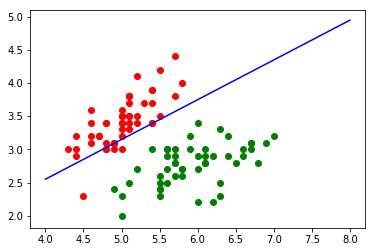

In [155]:
# 计算x2

def cal_x2(x1):
    return - (LR.coef[0] * x1 - LR.intercept)/LR.coef[1]

X = iris.data
y = iris.target

# 只用两个特征可视化：
X = X[y<2,:2]
y = y[y<2]

x1_plot = np.linspace(4,8,1000)
x2_plot = cal_x2(x1_plot)

plt.scatter(X[y==0,0], X[y==0,1], color = 'red')
plt.scatter(X[y==1,0], X[y==1,1], color = 'green')
plt.plot(x1_plot, x2_plot, color = 'blue')
plt.show()


从上图可以看到，这两个target被分成了两部分。但是之前我们的预测score是1，应该全部都对，但是目前红点有判断错误的。这是因为这是用的全部数据，而打分的时候用的是test的数据。对于正好在边界的数据，我们分成哪一类都可以。

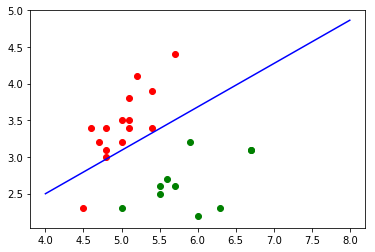

In [116]:
plt.scatter(X_test[y_test==0,0], X_test[y_test==0,1], color = 'red')
plt.scatter(X_test[y_test==1,0], X_test[y_test==1,1], color = 'green')
plt.plot(x1_plot, x2_plot, color = 'blue')
plt.show()

In [ ]:
# 直接写一个画边界的函数

def plot_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    
    h = .02  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(4, 3))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Set3_r)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Blues_r)
    plt.show()
    

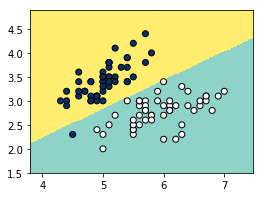

In [156]:
plot_boundary(LR, X, y)

---

### 5. 在逻辑回归中使用多项式特征

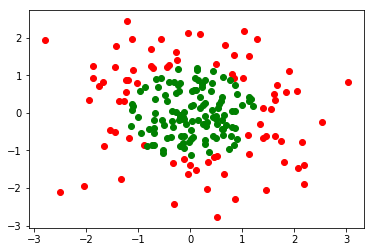

In [167]:
np.random.seed(1)
X = np.random.normal(0,1,size = (200,2))
y = np.array(X[:,0] ** 2 + X[:,1]**2 < 1.5, dtype='int')
plt.scatter(X[y==0,0], X[y==0,1], color = 'red')
plt.scatter(X[y==1,0], X[y==1,1], color = 'green')
plt.show()

In [158]:
LR = LogisticRegression()

LR.fit(X,y)
LR.score(X,y)

0.6

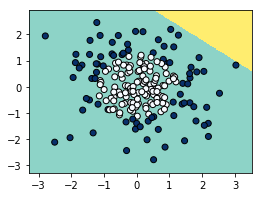

In [159]:
plot_boundary(LR, X, y)

这样分类的效果是很一般的。下面用sklearn为逻辑回归增加多项式特征：

In [160]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# 必须符合scikit_learn的标准才可以用

def PolynomialLR(degree):
    return Pipeline([
    ('poly', PolynomialFeatures(degree=degree)),
    ('std_scaler', StandardScaler()),
    ('LR', LogisticRegression())
    ])

# 调用
poly_LR = PolynomialLR(degree = 2)
poly_LR.fit(X,y)
poly_LR.score(X,y)

0.955

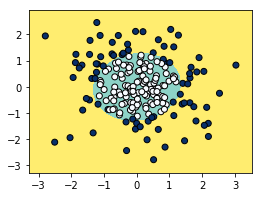

In [161]:
plot_boundary(poly_LR, X, y)

由此可见，这样的效果比之前好了许多。

---

### 6. 多分类问题

两种方式：

1). OvR (One vs Rest)

每次将某个与剩下的所有的分类，n个类别进行n次分类，选择分类得分最高的。

2). OvO (One vs One)

两两组合，比如四个类别有六个组，选择赢数最高的分类。


In [162]:
from sklearn.linear_model import LogisticRegression

# 只使用前两种feature，方便可视化

X = iris.data[:,:2]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y)

scikit_LR = LogisticRegression()

# 默认multi_class='ovr'，即OVR
scikit_LR.fit(X_train, y_train)
scikit_LR.score(X_test, y_test)

0.7631578947368421

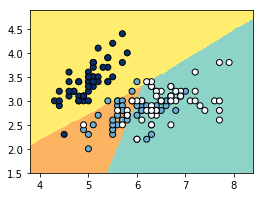

In [163]:
plot_boundary(scikit_LR, X,y)

In [165]:
# 修改为OVO

# 修改 multi_class='multinomial'；需要注意的是，solver也需要改变，scikit_learn不仅仅使用梯度下降法，默认是使用liblinear的，但是对于OVO是实效的
scikit_LR2 = LogisticRegression(multi_class='multinomial', solver='newton-cg')

scikit_LR2.fit(X_train, y_train)
scikit_LR2.score(X_test, y_test)

0.8947368421052632

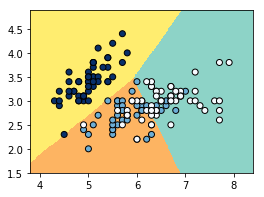

In [166]:
plot_boundary(scikit_LR2, X,y)

在这个情况下，显然OVO的效果比OVR更优一点。